# One - Way ANOVA
****

The task is base on, an example hypothesis test using ANOVA, finding a data set on which
it is appropriate to use ANOVA, ensure the assumptions underlying ANOVA are
met, and then I will perform and display the results of your ANOVA using scipy.stats
****

The one-way analysis of variance (ANOVA) is used to determine whether there are any statistically significant differences between the means of two or more independent (unrelated) groups (although you tend to only see it used when there are a minimum of three, rather than two groups). For example, you could use a one-way ANOVA to understand whether exam performance differed based on test anxiety levels amongst students, dividing students into three independent groups (e.g., low, medium and high-stressed students). Also, it is important to realize that the one-way ANOVA is an omnibus test statistic and cannot tell you which specific groups were statistically significantly different from each other; it only tells you that at least two groups were different. Since you may have three, four, five or more groups in your study design, determining which of these groups differ from each other is important. You can do this using a post hoc test.

https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php

In [2]:
# Data frames.
import pandas as pd

# Plotting.
import seaborn as sns

# Stats.
import scipy.stats as ss

# Numerical arrays.
import numpy as np

# Collections.
import collections as co

# Specials.
import scipy.special as spec

import matplotlib.pyplot as plt

### Loading The Data Set

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/G00387847/machineLearningTask/main/sleep.csv")
df

,Unnamed: 0,extra,group,ID
0,1,0.7,1,1
1,2,-1.6,1,2
2,3,-0.2,1,3
3,4,-1.2,1,4
4,5,-0.1,1,5
5,6,3.4,1,6
6,7,3.7,1,7
7,8,0.8,1,8
8,9,0.0,1,9
9,10,2.0,1,10


### Assumption #1: Dependent Variable
****
This should be measured at the interval or ratio level (i.e., they are continuous)

https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php

In [4]:
# The dependent variable.
dependent = df['extra']
dependent

0     0.7
1    -1.6
2    -0.2
3    -1.2
4    -0.1
5     3.4
6     3.7
7     0.8
8     0.0
9     2.0
10    1.9
11    0.8
12    1.1
13    0.1
14   -0.1
15    4.4
16    5.5
17    1.6
18    4.6
19    3.4
Name: extra, dtype: float64

In [5]:
dependent.describe()

count    20.00000
mean      1.54000
std       2.01792
min      -1.60000
25%      -0.02500
50%       0.95000
75%       3.40000
max       5.50000
Name: extra, dtype: float64

### Assumption #2: Independent Variable
****
This should consist of two or more categorical, independent groups.

In [6]:
# Independent variable.
independent = df['group']
independent

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    2
11    2
12    2
13    2
14    2
15    2
16    2
17    2
18    2
19    2
Name: group, dtype: int64

### Assumption #4
****
There should be no significant outliers. Outliers are simply single data points within your data that do not follow the usual patter

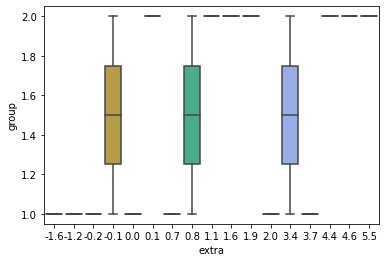

In [7]:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.boxplot(x=dependent, y=independent)

#### Assumption #5
****
The dependent variable should be approximately normally distributed for each category of the independent variable

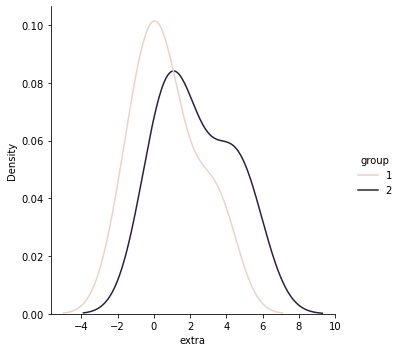

In [8]:
# KDEs of the three categories.
sns.displot(x=dependent, hue=independent, kind="kde")